In [7]:
#https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#1introduction
import pandas as pd
import numpy as np
import json
import glob

#Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

#spacy
import spacy
from nltk.corpus import stopwords

#vis
import matplotlib.pyplot as plt
import pyLDAvis
import pyLDAvis.gensim

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

## Preparing the Data

In [8]:
data = pd.read_csv('data_test_model.csv')["Review"]

In [9]:
def gen_words(texts):
    final = []
    for text in texts:
        new = gensim.utils.simple_preprocess(text, deacc=True)
        final.append(new)
    return (final)

data_words = gen_words(data)

print(data_words[0][0:20])

['haha']


In [10]:
id2word = corpora.Dictionary(data_words)

corpus = []
for text in data_words:
    new = id2word.doc2bow(text)
    corpus.append(new)

In [11]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=18,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha="auto")


In [12]:
# t = 'giá đắt thế'
t = 'gia dat the'
bow = lda_model.id2word.doc2bow(t.split(' '))
doc_topics, word_topics, phi_values = lda_model.get_document_topics(bow, per_word_topics=True)

doc_topics

[(0, 0.028233808),
 (2, 0.032924615),
 (3, 0.030127894),
 (4, 0.025217535),
 (6, 0.19920787),
 (8, 0.020838445),
 (10, 0.021322085),
 (11, 0.098757364),
 (12, 0.013507788),
 (13, 0.027876103),
 (14, 0.019286169),
 (15, 0.22483523),
 (16, 0.03231991),
 (17, 0.20266277)]

In [17]:
from operator import itemgetter

max(doc_topics, key=itemgetter(1))

(15, 0.22483523)

In [14]:
lda_model.show_topics(formatted=False, num_words= 10)

[(1,
  [('yeu_to', 0.09325314),
   ('toan', 0.077491865),
   ('thuong_hieu', 9.749254e-05),
   ('sanh', 9.74778e-05),
   ('goc', 9.7309094e-05),
   ('ky_vong', 9.727988e-05),
   ('dof', 9.7269796e-05),
   ('bo_nho', 9.7267475e-05),
   ('reviewer', 9.720765e-05),
   ('pay', 9.716581e-05)]),
 (9,
  [('san_pham', 0.34771645),
   ('chi_phi', 7.880715e-05),
   ('loi_nhuan', 7.723604e-05),
   ('cong_ty', 7.676649e-05),
   ('goc', 7.676494e-05),
   ('tong_tieng', 7.6760385e-05),
   ('đai_ly', 7.6760385e-05),
   ('quang_cao', 7.6760385e-05),
   ('leo', 7.6760385e-05),
   ('lai', 7.6760385e-05)]),
 (7,
  [('full', 0.16787267),
   ('haha', 0.15736155),
   ('dung_luong', 0.1530936),
   ('chuc_nang', 0.12078191),
   ('an_tuong', 0.032865204),
   ('website', 4.3414937e-05),
   ('tru', 4.3414937e-05),
   ('system', 4.330696e-05),
   ('vuot', 4.3288375e-05),
   ('cho', 4.3266555e-05)]),
 (5,
  [('đem', 0.311206),
   ('can', 0.28108236),
   ('than', 0.095969),
   ('soc', 3.6651945e-05),
   ('pixel', 3

## Vizualizing the Data

In [15]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis

c:\Users\Nguyen Quang Tu\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
15     0.010529  0.540547       1        1  30.860640
11     0.470955  0.178819       2        1  14.320916
17    -0.307479  0.362169       3        1   9.291347
6      0.250643 -0.426073       4        1   8.207678
16     0.219330  0.321188       5        1   4.568350
2     -0.102448 -0.416326       6        1   4.267944
0     -0.387257  0.145365       7        1   4.012029
3     -0.035799  0.306755       8        1   3.998686
13     0.411023 -0.147759       9        1   3.588770
4     -0.423803 -0.069922      10        1   3.499077
8      0.278047  0.101916      11        1   2.840117
10    -0.299046 -0.327615      12        1   2.810374
14    -0.224640 -0.127728      13        1   2.687953
12     0.073508 -0.297985      14        1   1.849174
5     -0.121736  0.070562      15        1   1.291360
7      0.169485 -0.109667      16        1   0.989919
9      0.021093 -0.073478      17        1   0.621223
1     -0.002405 -0.030768      18        1   0.294445, topic_info=         Term          Freq         Total Category  logprob  loglift
37        gia  10189.000000  10189.000000  Default  30.0000  30.0000
39   hinh_anh  14412.000000  14412.000000  Default  29.0000  29.0000
91       tien   6055.000000   6055.000000  Default  28.0000  28.0000
159       pin   4319.000000   4319.000000  Default  27.0000  27.0000
46   man_hinh  12229.000000  12229.000000  Default  26.0000  26.0000
..        ...           ...           ...      ...      ...      ...
501     thong      0.050681      1.970955  Topic18  -9.2405   2.1671
894      plus      0.050684      1.976243  Topic18  -9.2404   2.1645
335      quan      0.050681      1.972912  Topic18  -9.2404   2.1661
246      phan      0.050680      1.972038  Topic18  -9.2405   2.1665
682  facebook      0.050679      1.971886  Topic18  -9.2405   2.1666

[721 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
156      16  0.973101  an_tuong
840      12  0.999484   android
128       4  0.897827       anh
77        8  0.998229       app
120       5  0.998511       ban
...     ...       ...       ...
222       4  0.995885      đien
206       4  0.998327      đinh
70        6  0.994576       đon
93       14  0.998526      đong
76        6  0.996843       đot

[147 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[16, 12, 18, 7, 17, 3, 1, 4, 14, 5, 9, 11, 15, 13, 6, 8, 10, 2])

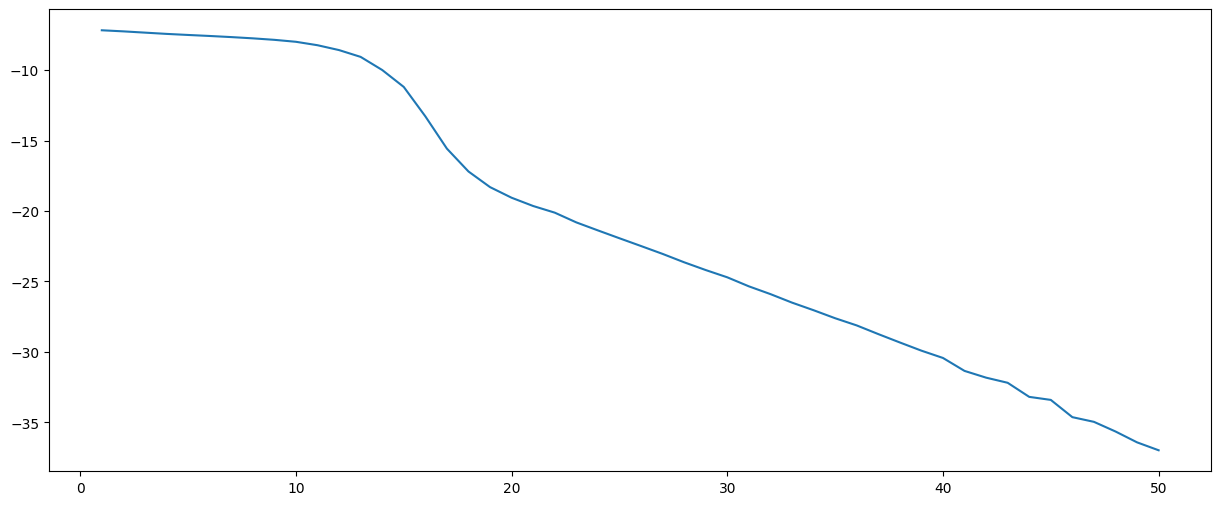

In [16]:
perplexity = pd.read_csv('perplexity.csv')
plt.figure(figsize=(15, 6))
plt.plot(perplexity['NumTopics'], perplexity['perplexity'])